# B"H

---


## Line Plots

---

In [1]:
import os
import sys

# Import the regular expression module
import re

import numpy as np

import pandas as pd
from scipy.stats import zscore

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Prior size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

print ("Current size:", fig_size)

Prior size: [6.0, 4.0]
Current size: [12, 9]


In [3]:
# -- -----------------------------------------------------------------
PROJ_ROOT = '../..'

print("------------------------------")
print("          PROJ_ROOT           ")
print(os.path.abspath(PROJ_ROOT))
print("------------------------------")
print(" ")
# -- -----------------------------------------------------------------



# -- -----------------------------------------------------------------
# add the 'src' directory as one where we can import modules
src_dir = os.path.join(PROJ_ROOT, 'src')
sys.path.append(src_dir)


print("------------------------------")
print("           src_dir            ")
print(os.path.abspath(src_dir))
print("------------------------------")
print(" ")
# -- -----------------------------------------------------------------



# -- -----------------------------------------------------------------
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

# import my method from the source code
%aimport helper_functions
import helper_functions as hf
# -- -----------------------------------------------------------------

------------------------------
          PROJ_ROOT           
/home/baruch/repos/coding_deep_dive/env-python-learn
------------------------------
 
------------------------------
           src_dir            
/home/baruch/repos/coding_deep_dive/env-python-learn/src
------------------------------
 


---

### Datasets used for below plots

In [4]:
df_degrees = hf.read_csv(
    p_dir          = hf.DATA_RAW_DIR, 
    p_file_name    = 'percent-bachelors-degrees-women-usa.csv'    
)


df_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


In [6]:
computer_science  = df_degrees['Computer Science'].values
physical_sciences = df_degrees['Physical Sciences'].values
health            = df_degrees['Health Professions'].values
education         = df_degrees['Education'].values
year              = df_degrees['Year'].values

---
### Using subplot() 

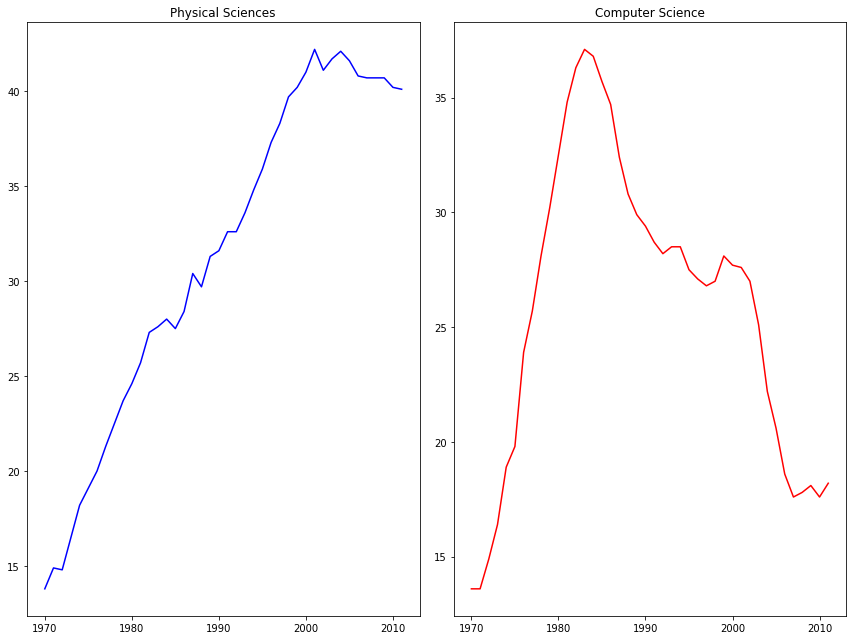

In [10]:
# Create a figure with 1x2 subplot and make the left subplot active
plt.subplot(1, 2, 1) 

plt.plot(df_degrees['Year'], df_degrees['Physical Sciences'], color='blue')
plt.title('Physical Sciences')

# Make the right subplot active in the current 1x2 subplot grid
plt.subplot(1, 2, 2)

plt.plot(df_degrees['Year'], df_degrees['Computer Science'], color='red')
plt.title('Computer Science')

# Use plt.tight_layout() to improve the spacing between subplots
plt.tight_layout()
plt.show()

---
### Using xlim(), ylim()

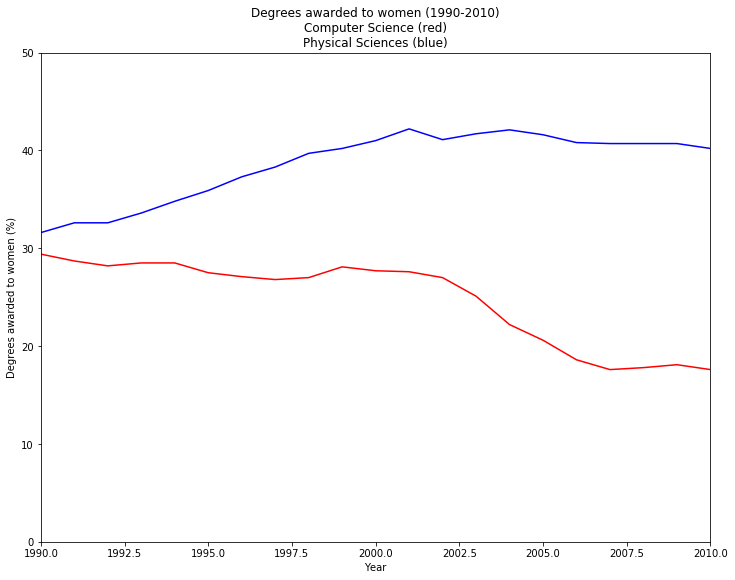

In [7]:
plt.plot(df_degrees['Year'], df_degrees['Physical Sciences'], color='blue')
plt.plot(df_degrees['Year'], df_degrees['Computer Science'],  color='red')

# Add the axis labels
plt.xlabel('Year')
plt.ylabel('Degrees awarded to women (%)')

# Set the x-axis range
plt.xlim(1990,2010) 

# Set the y-axis range
plt.ylim(0,50)

plt.title('Degrees awarded to women (1990-2010)\nComputer Science (red)\nPhysical Sciences (blue)')
plt.show()

# Save the image as 'xlim_and_ylim.png'
# plt.savefig('xlim_and_ylim.png')

---
### Using legend()

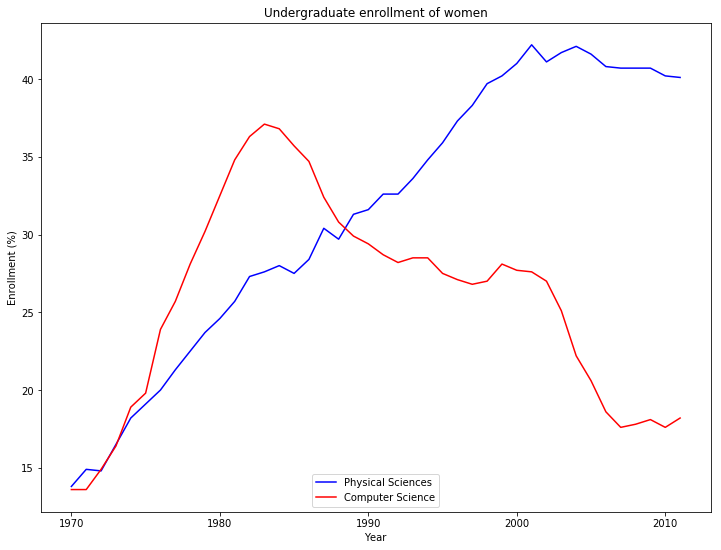

In [8]:
plt.plot(df_degrees['Year'], df_degrees['Physical Sciences'], color='blue')
plt.plot(df_degrees['Year'], df_degrees['Computer Science'],  color='red')

# Add a legend at the lower center
plt.legend(loc='lower center')

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Enrollment (%)')
plt.title('Undergraduate enrollment of women')
plt.show()


---
### Using annotate()

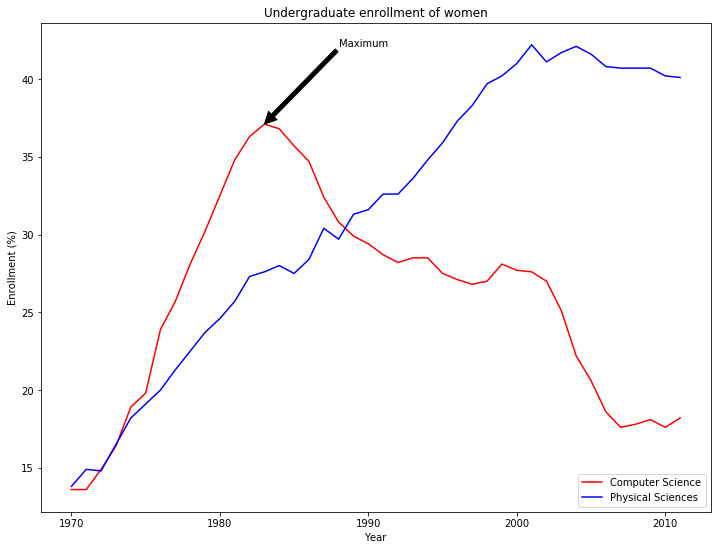

In [9]:
# Plot with legend as before
plt.plot(year, computer_science, color='red', label='Computer Science') 
plt.plot(year, physical_sciences, color='blue', label='Physical Sciences')
plt.legend(loc='lower right')

# Compute the maximum enrollment of women in Computer Science: cs_max
cs_max = computer_science.max()

# Calculate the year in which there was maximum enrollment of women in Computer Science: yr_max
yr_max = year[computer_science.argmax()]


# Add a black arrow annotation
plt.annotate(
    'Maximum', 
    xy         = (yr_max, cs_max), 
    xytext     = (yr_max+5, cs_max+5), 
    arrowprops = dict(facecolor='black')
)


# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Enrollment (%)')
plt.title('Undergraduate enrollment of women')
plt.show()


---
### Modifying styles

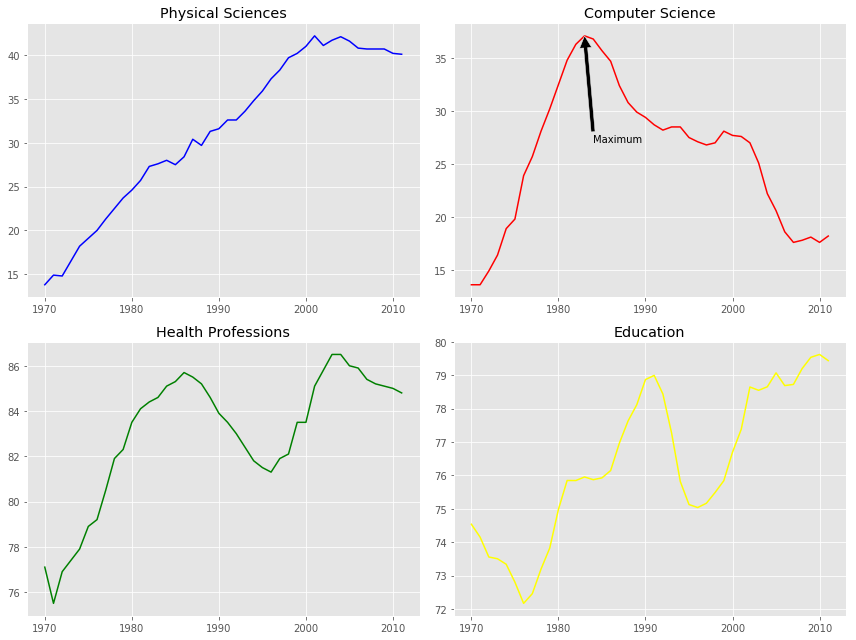

In [12]:
# Set the style to ggplot
plt.style.use('ggplot')

# Create a figure with 2x2 subplot layout
plt.subplot(2, 2, 1) 

# Plot the enrollment % of women in the Physical Sciences
plt.plot(year, physical_sciences, color='blue')
plt.title('Physical Sciences')

# Plot the enrollment % of women in Computer Science
plt.subplot(2, 2, 2)
plt.plot(year, computer_science, color='red')
plt.title('Computer Science')

# Add annotation
cs_max = computer_science.max()
yr_max = year[computer_science.argmax()]
plt.annotate('Maximum', xy=(yr_max, cs_max), xytext=(yr_max+1, cs_max-10), arrowprops=dict(facecolor='black'))

# Plot the enrollmment % of women in Health professions
plt.subplot(2, 2, 3)
plt.plot(year, health, color='green')
plt.title('Health Professions')

# Plot the enrollment % of women in Education
plt.subplot(2, 2, 4)
plt.plot(year, education, color='yellow')
plt.title('Education')

# Improve spacing between subplots and display them
plt.tight_layout()
plt.show()
